# Loveida Lucero

# Chicago Crime Trending

**Imports**

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
import holidays
import datetime as dt
from holidays import country_holidays

plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("paper", font_scale=0.9)
plt.style.use(['ggplot'])

**Load and Prep Data**

In [2]:
!pip install holidays

In [3]:
# Use glob to get all filepaths that match the pattern 
crime_files = sorted(glob.glob("Data/Chicago-Crime_*.csv"))
crime_files

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [4]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in crime_files])
df.reset_index()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [5]:
df['Primary Type'].value_counts()

THEFT                                1626992
BATTERY                              1410889
CRIMINAL DAMAGE                       878914
NARCOTICS                             746155
ASSAULT                               501103
OTHER OFFENSE                         479174
BURGLARY                              422246
MOTOR VEHICLE THEFT                   366586
DECEPTIVE PRACTICE                    340958
ROBBERY                               289677
CRIMINAL TRESPASS                     212869
WEAPONS VIOLATION                     103906
PROSTITUTION                           69750
OFFENSE INVOLVING CHILDREN             55280
PUBLIC PEACE VIOLATION                 52086
SEX OFFENSE                            30442
CRIM SEXUAL ASSAULT                    27584
INTERFERENCE WITH PUBLIC OFFICER       18206
LIQUOR LAW VIOLATION                   14846
GAMBLING                               14616
ARSON                                  13121
HOMICIDE                               12394
KIDNAPPING

In [6]:
df['Primary Type'] = df['Primary Type'].replace({'CRIM SEXUAL ASSAULT':'CRIMINAL SEXUAL ASSAULT',
                                                 'NON - CRIMINAL':'NON-CRIMINAL',})

In [7]:
# convert date column to datetime
date_format = '%m/%d/%Y %I:%M:%S %p'
df['Date'] = pd.to_datetime(df['Date'],format=date_format)

In [8]:
# set date as index
df = df.set_index('Date')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [9]:
df = df.sort_index()
df.index

DatetimeIndex(['2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               '2001-01-01 00:00:00', '2001-01-01 00:00:00',
               ...
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:45:00',
               '2022-12-31 23:45:00', '2022-12-31 23:47:00',
               '2022-12-31 23:47:00', '2022-12-31 23:50:00',
               '2022-12-31 23:50:00', '2022-12-31 23:55:00'],
              dtype='datetime64[ns]', name='Date', length=7713109, freq=None)

In [10]:
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 00:00:00,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01 00:00:00,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01 00:00:00,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707
2001-01-01 00:00:00,2280620,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782
2001-01-01 00:00:00,9755214,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:47:00,12938351,ASSAULT,SIMPLE,STREET,True,False,2221,22.0,21.0,41.727812,-87.660399
2022-12-31 23:47:00,12938340,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,2221,22.0,21.0,41.727812,-87.660399
2022-12-31 23:50:00,12938426,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1523,15.0,29.0,41.882257,-87.763744


# **Comparing Police Districts**t?

### Which district had the most crimes in 2022?
### Which had the least?

In [11]:
# isolate 2022
df_2022 = df.loc['2022']
df_2022

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2022-01-01 00:00:00,12701677,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2413,24.0,40.0,41.994004,-87.697387
2022-01-01 00:00:00,12615410,DECEPTIVE PRACTICE,"THEFT BY LESSEE, MOTOR VEHICLE",STREET,False,False,1235,12.0,25.0,41.852750,-87.640816
2022-01-01 00:00:00,12658052,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,511,5.0,8.0,41.717813,-87.598279
2022-01-01 00:00:00,12957426,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,632,6.0,8.0,NaN,NaN
2022-01-01 00:00:00,13002739,OFFENSE INVOLVING CHILDREN,CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,True,734,7.0,17.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:47:00,12938351,ASSAULT,SIMPLE,STREET,True,False,2221,22.0,21.0,41.727812,-87.660399
2022-12-31 23:47:00,12938340,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,2221,22.0,21.0,41.727812,-87.660399
2022-12-31 23:50:00,12938426,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1523,15.0,29.0,41.882257,-87.763744


In [12]:
# display district counts
value_counts = df_2022.value_counts('District')
value_counts

District
8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
dtype: int64

In [13]:
# display district index
value_counts.index

Float64Index([ 8.0,  6.0, 12.0,  4.0, 11.0,  1.0, 18.0, 19.0, 25.0,  3.0,  2.0,
               9.0,  7.0, 10.0,  5.0, 16.0, 24.0, 15.0, 14.0, 22.0, 17.0, 20.0,
              31.0],
             dtype='float64', name='District')

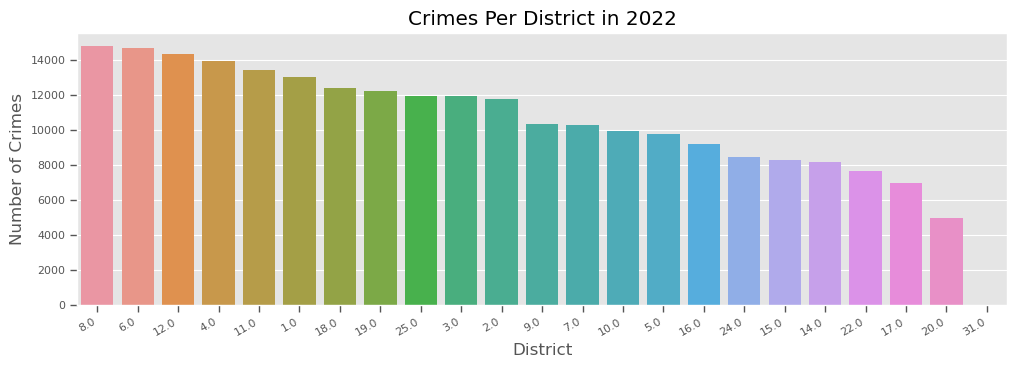

In [14]:
## Visualize district counts
ax = sns.countplot(data=df_2022, x='District',
                  order=value_counts.index)
ax.set_ylabel('Number of Crimes')
ax.set_title('Crimes Per District in 2022')
fig = ax.get_figure()
fig.autofmt_xdate()

In [15]:
# set min values
district_min = value_counts.idxmin()
crimes_min = value_counts.min()

# set max values
district_max = value_counts.idxmax()
crimes_max = value_counts.max()

In [16]:
print(f'District {district_max} had the most crimes in 2022, with a total of {crimes_max}.')

District 8.0 had the most crimes in 2022, with a total of 14805.


In [17]:
print(f'District {district_min} had the least crimes in 2022, with a total of {crimes_min}.')

District 31.0 had the least crimes in 2022, with a total of 15.


# **Crimes Across the Years:**

### Is the total number of crimes increasing or decreasing across the years?

In [18]:
# resample by year and display counts
df_res_year = df.resample('AS').size()
df_res_year

Date
2001-01-01    485886
2002-01-01    486807
2003-01-01    475985
2004-01-01    469422
2005-01-01    453773
2006-01-01    448179
2007-01-01    437087
2008-01-01    427183
2009-01-01    392827
2010-01-01    370513
2011-01-01    351993
2012-01-01    336319
2013-01-01    307536
2014-01-01    275789
2015-01-01    264787
2016-01-01    269823
2017-01-01    269100
2018-01-01    268899
2019-01-01    261325
2020-01-01    212194
2021-01-01    208824
2022-01-01    238858
Freq: AS-JAN, dtype: int64

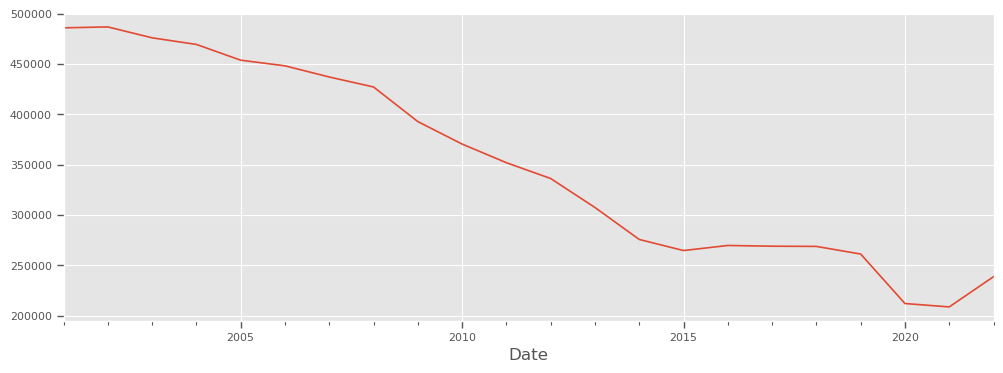

In [19]:
# Visualize the crimes over time
df_res_year.plot();

**The total crimes per year are decreasing over time.**

### Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [20]:
# groupy by crime/year and display counts
df_year = df.groupby('Primary Type').resample('AS').count()
df_year

ID  Primary Type  Description  \
Primary Type      Date                                          
ARSON             2001-01-01  1011          1011         1011   
                  2002-01-01  1032          1032         1032   
                  2003-01-01   955           955          955   
                  2004-01-01   778           778          778   
                  2005-01-01   691           691          691   
...                            ...           ...          ...   
WEAPONS VIOLATION 2018-01-01  5456          5456         5456   
                  2019-01-01  6339          6339         6339   
                  2020-01-01  8432          8432         8432   
                  2021-01-01  8980          8980         8980   
                  2022-01-01  8766          8766         8766   

                              Location Description  Arrest  Domestic  Beat  \
Primary Type      Date                                                       
ARSON             2001-01-01                  1011    1011      1011  1011   
                  2002-01-01                  1032    1032      1032  1032   
                  2003-01-01                   955     955       955   955   
                  2004-01-01                   778     778       778   778   
                  2005-01-01                   691     691       691   691   
...                                            ...     ...       ...   ...   
WEAPONS VIOLATION 2018-01-01                  5456    5456      5456  5456   
                  2019-01-01                  6339    6339      6339  6339   
                  2020-01-01                  8432    8432      8432  8432   
                  2021-01-01                  8979    8980      8980  8980   
                  2022-01-01                  8766    8766      8766  8766   

                              District  Ward  Latitude  Longitude  
Primary Type      Date                                             
ARSON             2001-01-01      1011     4      1005       1005  
                  2002-01-01      1032   723       978        978  
                  2003-01-01       955   955       953        953  
                  2004-01-01       778   778       774        774  
                  2005-01-01       691   691       688        688  
...                                ...   ...       ...        ...  
WEAPONS VIOLATION 2018-01-01      5456  5456      5444       5444  
                  2019-01-01      6339  6338      6338       6338  
                  2020-01-01      8432  8432      8417       8417  
                  2021-01-01      8980  8980      8945       8945  
                  2022-01-01      8766  8765      8697       8697  

[699 rows x 11 columns]

In [21]:
# drop unnecessary columns
df_year = df_year.drop(columns = ['ID','Description','Location Description','Arrest','Domestic','Beat','District','Ward','Latitude','Longitude'])
df_year

Primary Type
Primary Type      Date                    
ARSON             2001-01-01          1011
                  2002-01-01          1032
                  2003-01-01           955
                  2004-01-01           778
                  2005-01-01           691
...                                    ...
WEAPONS VIOLATION 2018-01-01          5456
                  2019-01-01          6339
                  2020-01-01          8432
                  2021-01-01          8980
                  2022-01-01          8766

[699 rows x 1 columns]

In [22]:
# unstack crimes to display counts each year
unstacked = df_year.unstack(level=0)
unstacked

Primary Type                             \
Primary Type        ARSON  ASSAULT  BATTERY BURGLARY   
Date                                                   
2001-01-01         1011.0  31384.0  93461.0  26014.0   
2002-01-01         1032.0  31523.0  94153.0  25623.0   
2003-01-01          955.0  29477.0  88380.0  25157.0   
2004-01-01          778.0  28850.0  87136.0  24564.0   
2005-01-01          691.0  27067.0  83964.0  25503.0   
2006-01-01          726.0  25945.0  80666.0  24324.0   
2007-01-01          712.0  26313.0  79593.0  24858.0   
2008-01-01          644.0  25448.0  75930.0  26218.0   
2009-01-01          616.0  22861.0  68460.0  26767.0   
2010-01-01          522.0  21537.0  65401.0  26422.0   
2011-01-01          504.0  20411.0  60459.0  26620.0   
2012-01-01          469.0  19900.0  59134.0  22845.0   
2013-01-01          364.0  17972.0  54006.0  17895.0   
2014-01-01          397.0  16903.0  49453.0  14569.0   
2015-01-01          453.0  17048.0  48923.0  13184.0   
2016-01-01          516.0  18742.0  50300.0  14289.0   
2017-01-01          444.0  19306.0  49239.0  13001.0   
2018-01-01          373.0  20406.0  49828.0  11747.0   
2019-01-01          376.0  20620.0  49517.0   9638.0   
2020-01-01          588.0  18252.0  41513.0   8757.0   
2021-01-01          529.0  20342.0  40462.0   6659.0   
2022-01-01          421.0  20796.0  40911.0   7592.0   

                                                                \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIMINAL DAMAGE   
Date                                                             
2001-01-01                                 1.0         55859.0   
2002-01-01                                 0.0         55941.0   
2003-01-01                                 0.0         55011.0   
2004-01-01                                 0.0         53164.0   
2005-01-01                                 0.0         54548.0   
2006-01-01                                 0.0         57124.0   
2007-01-01                                 0.0         53749.0   
2008-01-01                                 0.0         52843.0   
2009-01-01                                 0.0         47725.0   
2010-01-01                                 0.0         40654.0   
2011-01-01                                 0.0         37331.0   
2012-01-01                                 0.0         35855.0   
2013-01-01                                 0.0         30855.0   
2014-01-01                                15.0         27799.0   
2015-01-01                                34.0         28677.0   
2016-01-01                                36.0         31018.0   
2017-01-01                                69.0         29045.0   
2018-01-01                               149.0         27823.0   
2019-01-01                               217.0         26681.0   
2020-01-01                               148.0         24877.0   
2021-01-01                               173.0         25094.0   
2022-01-01                               177.0         27241.0   

                                                                           \
Primary Type CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS DECEPTIVE PRACTICE   
Date                                                                        
2001-01-01                    1808.0           13241.0            14949.0   
2002-01-01                    1834.0           13880.0            13732.0   
2003-01-01                    1612.0           14807.0            13459.0   
2004-01-01                    1580.0           15913.0            13255.0   
2005-01-01                    1558.0           16655.0            13590.0   
2006-01-01                    1486.0           14505.0            13606.0   
2007-01-01                    1560.0           13699.0            14170.0   
2008-01-01                    1562.0           12310.0            14933.0   
2009-01-01                    1443.0           10851.0            13877.0   
2010-01-01                    1391.0 

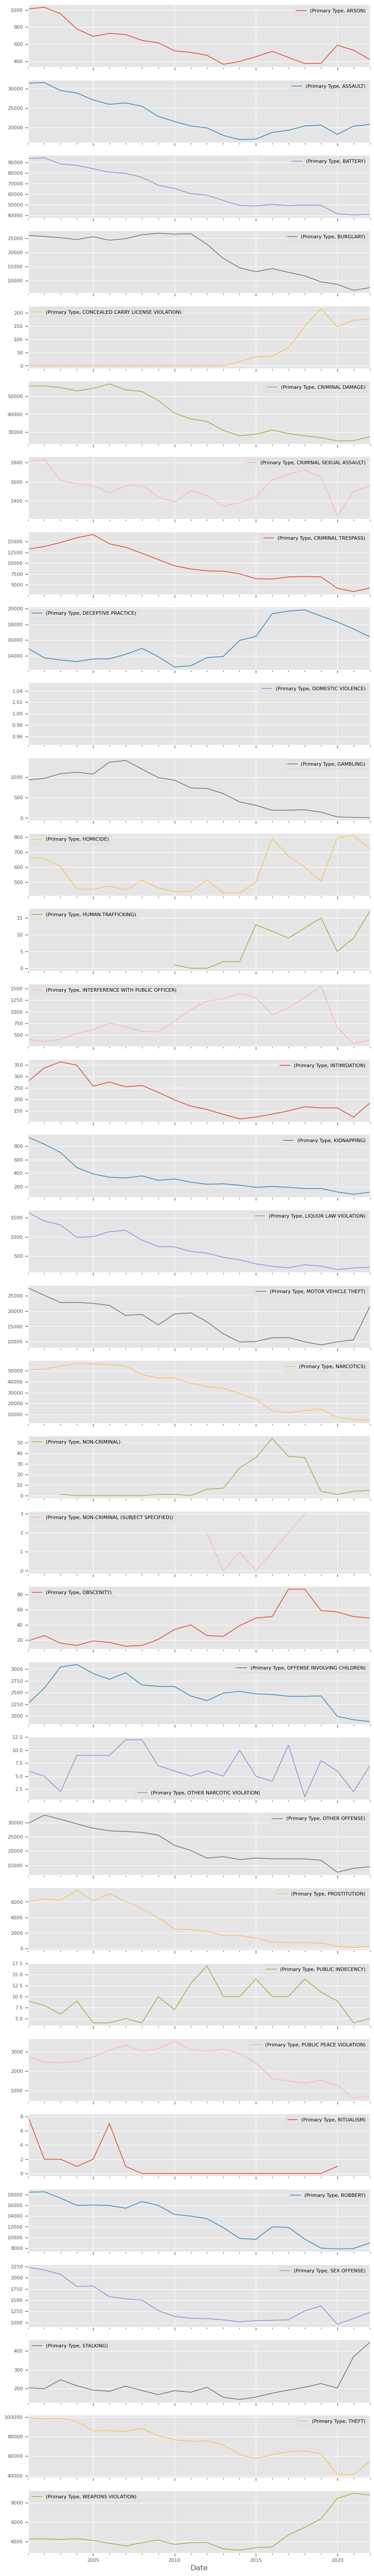

In [23]:
# plot each individual crimes
unstacked.plot(subplots=True,figsize=(10,75),grid=True);

- Individual crimes with an upward trend compared the downward of combined:
    - Concealed Carry License
    - Criminal Sexual Assault
    - Deceptive Practice
    - Homocide
    - Human Trafficking
    - Non-Criminal
    - Non-Criminal(Subject Specified)
    - Obscenity
    - Other Narcotic Violation
    - Public Indecency
    - Stalking
    - Weapons Violations

## **Comparing Holidays:**

### ​What are the top 3 holidays with the largest number of crimes?

In [24]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [25]:
# make copy of original df
hol_df = df.copy()
hol_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137
2001-01-01,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707


In [26]:
# Saving date column from index
hol_df['Date'] = hol_df.index.date
hol_df.head(3)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date
Date,,,,,,,,,,,,
2001-01-01,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923,2001-01-01
2001-01-01,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137,2001-01-01
2001-01-01,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707,2001-01-01


In [27]:
# Saving holiday type as column
hol_df["US Holiday"] = [us_holidays.get(day) for day in hol_df['Date']]
hol_df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Date,US Holiday
Date,,,,,,,,,,,,,
2001-01-01 00:00:00,3214584,THEFT,FINANCIAL ID THEFT: OVER $300,STREET,False,False,2221,22.0,21.0,41.732563,-87.669923,2001-01-01,New Year's Day
2001-01-01 00:00:00,1927872,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,812,8.0,NaN,41.778094,-87.770137,2001-01-01,New Year's Day
2001-01-01 00:00:00,4768442,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,False,2124,2.0,4.0,41.807275,-87.593707,2001-01-01,New Year's Day
2001-01-01 00:00:00,2280620,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,915,9.0,20.0,41.806311,-87.674782,2001-01-01,New Year's Day
2001-01-01 00:00:00,9755214,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1022,10.0,24.0,NaN,NaN,2001-01-01,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:47:00,12938351,ASSAULT,SIMPLE,STREET,True,False,2221,22.0,21.0,41.727812,-87.660399,2022-12-31,None
2022-12-31 23:47:00,12938340,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,APARTMENT,True,False,2221,22.0,21.0,41.727812,-87.660399,2022-12-31,None
2022-12-31 23:50:00,12938426,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1523,15.0,29.0,41.882257,-87.763744,2022-12-31,None


In [28]:
# US Holidays
hol_df['US Holiday'].value_counts()

New Year's Day                                     32725
Independence Day                                   22672
Labor Day                                          22164
Memorial Day                                       21125
Columbus Day                                       20920
Veterans Day                                       20418
Martin Luther King Jr. Day                         17916
Washington's Birthday                              17597
Thanksgiving                                       14798
Christmas Day                                      12418
Independence Day (Observed)                         5884
Veterans Day (Observed)                             5842
Christmas Day (Observed)                            4929
New Year's Day (Observed)                           4877
Juneteenth National Independence Day                1450
Juneteenth National Independence Day (Observed)     1403
Name: US Holiday, dtype: int64

**The top 3 holidays with the largest number of crimes:**
- New Year's Day (32,725)
- Independence Day (22,672)
- Labor Day (22,164)

### For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [31]:
## top 3 holiday filters
filter1 = hol_df['US Holiday']=="New Year's Day"
filter2 = hol_df['US Holiday']=='Independence Day'
filter3 = hol_df['US Holiday']=='Labor Day'

# apply filters
nyd_df = hol_df.loc[filter1]
id_df = hol_df.loc[filter2]
ld_df = hol_df.loc[filter3]

In [32]:
# new year's day value counts
nyd_df['Primary Type'].value_counts()

THEFT                                6845
BATTERY                              6043
CRIMINAL DAMAGE                      3236
DECEPTIVE PRACTICE                   2934
OFFENSE INVOLVING CHILDREN           2380
OTHER OFFENSE                        2380
NARCOTICS                            1498
ASSAULT                              1216
MOTOR VEHICLE THEFT                   994
CRIMINAL SEXUAL ASSAULT               961
SEX OFFENSE                           900
BURGLARY                              837
WEAPONS VIOLATION                     831
ROBBERY                               765
CRIMINAL TRESPASS                     469
PUBLIC PEACE VIOLATION                114
PROSTITUTION                           60
INTERFERENCE WITH PUBLIC OFFICER       56
LIQUOR LAW VIOLATION                   56
HOMICIDE                               32
ARSON                                  30
KIDNAPPING                             25
STALKING                               21
OBSCENITY                         

**Top 5 crimes of New Year's Day:**
- Theft (6845)
- Battery (6043)
- Criminal Damage (3236)
- Deceptive Practice (2934)
- Offense Involving Children (2380)

In [33]:
# independence day value counts
id_df['Primary Type'].value_counts()

BATTERY                              5805
THEFT                                4074
CRIMINAL DAMAGE                      3309
ASSAULT                              1547
NARCOTICS                            1522
OTHER OFFENSE                        1234
BURGLARY                             1080
MOTOR VEHICLE THEFT                   893
ROBBERY                               770
DECEPTIVE PRACTICE                    502
WEAPONS VIOLATION                     448
CRIMINAL TRESPASS                     433
PUBLIC PEACE VIOLATION                219
OFFENSE INVOLVING CHILDREN            193
CRIMINAL SEXUAL ASSAULT               141
PROSTITUTION                          108
SEX OFFENSE                            92
INTERFERENCE WITH PUBLIC OFFICER       71
ARSON                                  59
HOMICIDE                               50
LIQUOR LAW VIOLATION                   38
GAMBLING                               31
KIDNAPPING                             19
INTIMIDATION                      

**Top 5 crimes on Independence Day**
- Battery (5805)
- Theft (4074)
- Criminal Damage (3309)
- Assault (1547)
- Narcotics (1522)

In [35]:
# labor day value counts
ld_df['Primary Type'].value_counts()

BATTERY                              4607
THEFT                                4520
CRIMINAL DAMAGE                      2475
NARCOTICS                            2078
ASSAULT                              1525
OTHER OFFENSE                        1400
BURGLARY                             1049
MOTOR VEHICLE THEFT                   986
ROBBERY                               830
DECEPTIVE PRACTICE                    685
CRIMINAL TRESPASS                     599
WEAPONS VIOLATION                     374
OFFENSE INVOLVING CHILDREN            212
CRIMINAL SEXUAL ASSAULT               128
PUBLIC PEACE VIOLATION                128
PROSTITUTION                          126
SEX OFFENSE                           116
GAMBLING                               81
INTERFERENCE WITH PUBLIC OFFICER       69
ARSON                                  51
HOMICIDE                               46
KIDNAPPING                             24
LIQUOR LAW VIOLATION                   19
STALKING                          

**Top 5 crimes on Labor Day**
- Battery (4607)
- Theft (4520)
- Criminal Damage (2475)
- Narcotics (2078)
- Assault (1525)

## **Comparing AM vs. PM Rush Hour:**
  - Are crimes more common during AM rush hour or PM rush hour?
    - You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour
    - You can consider any crime that occurred between 4 - 7 PM as PM rush hour.
:** ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?n:** ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

## **Comparing Months:**
  - ​What months have the most crime? What months have the least?
  - Are there any individual crimes that do not follow this pattern? If so, which crimes?

## **What cycles (seasonality) can you find in this data?**
  - **Make sure to select the data of interest and that it is resampled to the frequency you want.** *(See the "Suggested data to check for seasons" list at the bottom of this topic for suggestions).*
  - **Use statsmodels.tsa.seasonal.seasonal_decompose() to decompose the time series.**
    - Note: seasonal_decompose cannot read data resampled as minutes or smaller, and if you try seconds, you will crash your computer. Keep your resampling at hours or more.

  - **Show and describe each cycle you can find.**
  - (Hint: If your seasonal results are too dense to read, try zooming in to look at just one year or one month and try different levels of resampling).
  - ​How long is a cycle?
  - ​What is the magnitude of the cycle? (Compare min and max).

  - Suggested data to check for seasons:
    - Total Crime (Daily)
    - Total Crime (Weekly)
    - Total Crime (Monthly)
    - Select a Primary Type of interest to you (Daily)
    - Select a Primary Type of interest to you (Weekly)
    - Select a Primary Type of interest to you (Monthly)